In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as mcolors
import matplotlib.cm as cm
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

In [2]:
X=np.loadtxt('Datos_serie.dat')

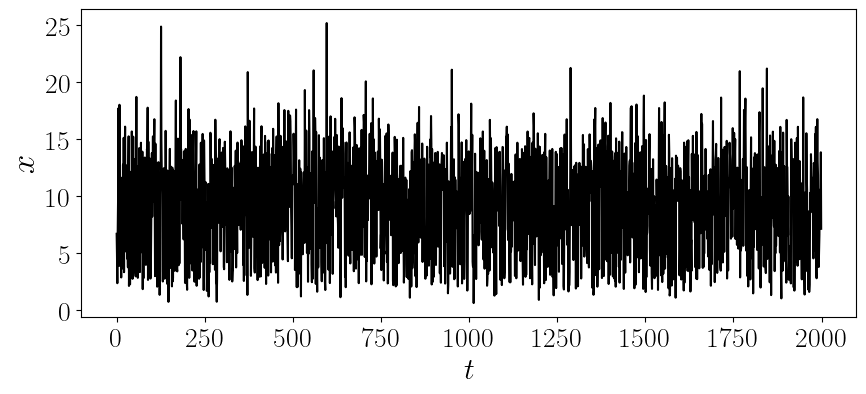

In [3]:
fig = plt.figure(figsize=(10,4),facecolor='white')
plt.plot(X,'k-')
plt.ylabel(r'$x$',size=25)
plt.xlabel(r'$t$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

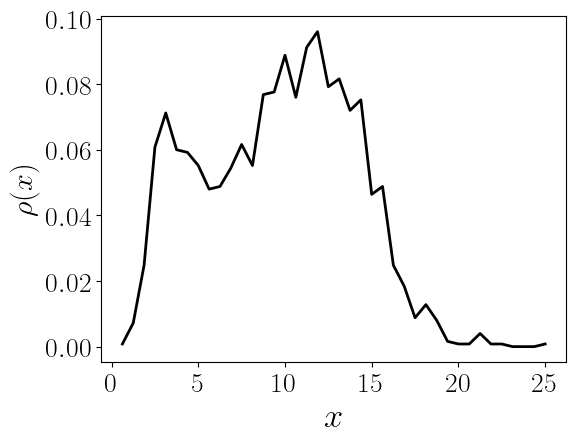

In [4]:
binL=np.linspace(0,25,41)
fig = plt.figure(figsize=(6,4.5),facecolor='white')
counts,base=np.histogram(X,bins=binL,density=True)
plt.plot(base[1::],counts,'k-',linewidth=2)
plt.xlabel(r'$x$',size=25)
plt.ylabel(r'$\rho(x)$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.savefig("Plot.png",bbox_inches="tight")
plt.show()

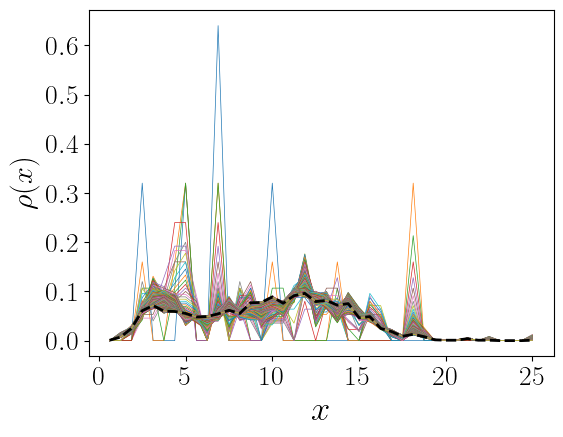

In [5]:
fig = plt.figure(figsize=(6,4.5),facecolor='white')
for ss in range(5,len(X),5):
    counts,base=np.histogram(X[0:ss],bins=binL,density=True)
    plt.plot(base[1::],counts,'-',linewidth=0.5)
counts,base=np.histogram(X,bins=binL,density=True)
plt.plot(base[1::],counts,'k--',linewidth=2)
plt.xlabel(r'$x$',size=25)
plt.ylabel(r'$\rho(x)$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.savefig("Plot.png",bbox_inches="tight")
plt.show()

In [6]:
def D_KL(prob_P,prob_Q,binsize):
    out = 0
    for i in range(len(prob_P)):
        if prob_P[i] != 0 and prob_Q[i] != 0:
                out += prob_P[i] * (np.log(prob_P[i]) - np.log(prob_Q[i]))
    return out*binsize

In [7]:
binsize=(base[1]-base[0])
sum(counts)*binsize

1.0000000000000004

In [8]:
def D_JS(prob_P,prob_Q,binsize):
    prob_M=0.5*(prob_P+prob_Q)
    dist=0.5*(D_KL(prob_P,prob_M,binsize)+D_KL(prob_Q,prob_M,binsize))
    return dist

In [9]:
D_JSlist=[]
N_list=[]
counts_total,base_total=np.histogram(X,bins=binL,density=True)
binsize=(base_total[1]-base_total[0])
print(sum(counts_total)*binsize)
for ss in range(5,len(X),1):
    counts,base=np.histogram(X[0:ss],bins=binL,density=True)
    D_JSlist.append(D_JS(counts_total,counts,binsize))
    N_list.append(ss)

1.0000000000000004


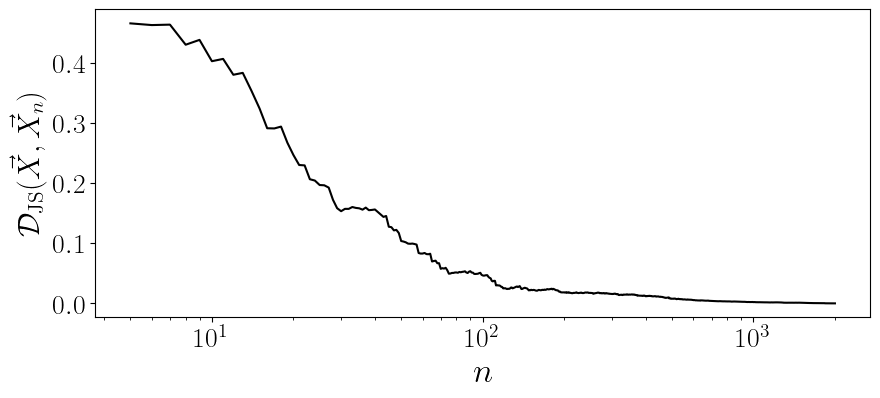

In [10]:
fig = plt.figure(figsize=(10,4),facecolor='white')
plt.semilogx(N_list,D_JSlist,'k-')
plt.xlabel(r'$n$',size=25)
plt.ylabel(r'$\mathcal{D}_{\mathrm{JS}}(\vec{X},\vec{X}_n)$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

In [11]:
D_JSlist_delta=[]
N_list=[]
print(sum(counts_total)*binsize)
for ss in range(5,len(X)-1,1):
    counts1,base1=np.histogram(X[0:ss],bins=binL,density=True)
    counts2,base2=np.histogram(X[0:ss+1],bins=binL,density=True)
    D_JSlist_delta.append(D_JS(counts1,counts2,binsize))
    N_list.append(ss)

1.0000000000000004


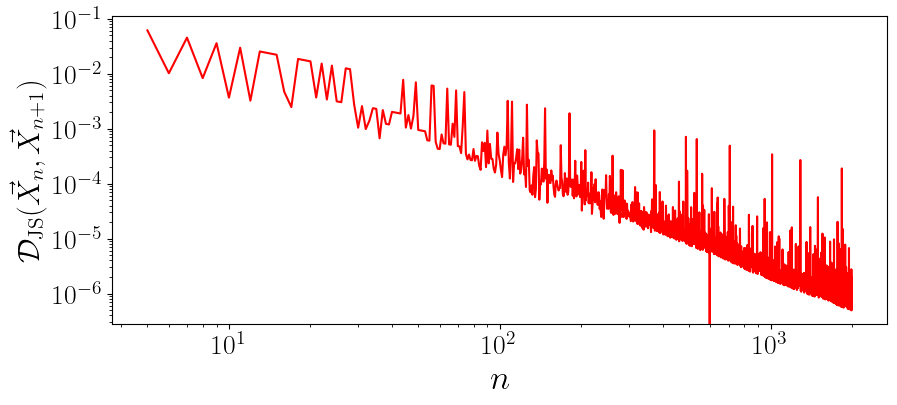

In [12]:
fig = plt.figure(figsize=(10,4),facecolor='white')
plt.loglog(N_list,D_JSlist_delta,'r-')
plt.xlabel(r'$n$',size=25)
plt.ylabel(r'$\mathcal{D}_{\mathrm{JS}}(\vec{X}_n,\vec{X}_{n+1})$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()